In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df=pd.read_csv("/content/placementdata.csv")

In [3]:
df.shape

(10000, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [5]:
df.head(20)

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
5,6,7.0,0,2,2,71,4.2,Yes,No,55,66,NotPlaced
6,7,7.7,1,1,1,76,4.0,No,No,62,65,NotPlaced
7,8,7.7,2,1,0,85,3.5,Yes,Yes,59,72,NotPlaced
8,9,6.5,1,1,0,84,3.9,No,Yes,75,71,NotPlaced
9,10,7.8,1,3,2,79,4.4,Yes,Yes,85,86,Placed


In [6]:
# Drop StudentID as it is not useful for prediction
df.drop(columns=['StudentID'], inplace=True)

In [7]:
df.isnull().sum()

,0
CGPA,0
Internships,0
Projects,0
Workshops/Certifications,0
AptitudeTestScore,0
SoftSkillsRating,0
ExtracurricularActivities,0
PlacementTraining,0
SSC_Marks,0
HSC_Marks,0


In [8]:
#Encode categorical variables (Yes -> 1, No -> 0)
label_encoder = LabelEncoder()
df['ExtracurricularActivities'] = label_encoder.fit_transform(df['ExtracurricularActivities'])
df['PlacementTraining'] = label_encoder.fit_transform(df['PlacementTraining'])
df['PlacementStatus'] = label_encoder.fit_transform(df['PlacementStatus'])  # Target variable

In [9]:
df.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,0,0,61,79,0
1,8.9,0,3,2,90,4.0,1,1,78,82,1
2,7.3,1,2,2,82,4.8,1,0,79,80,0
3,7.5,1,1,2,85,4.4,1,1,81,80,1
4,8.3,1,2,2,86,4.5,1,1,74,88,1


<ipython-input-10-3458de97f363>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PlacementStatus', data=df, palette='coolwarm')


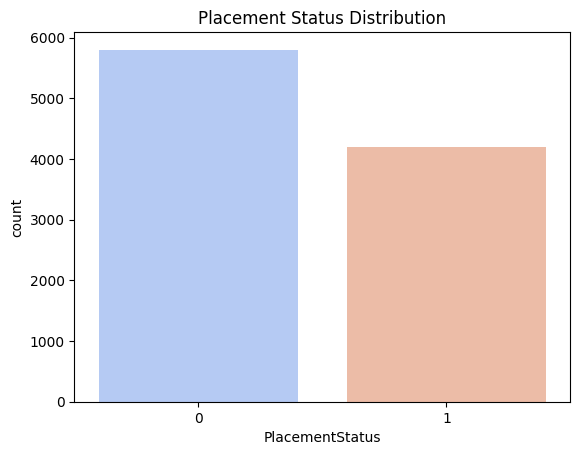

In [10]:
#Distribution of target variable
sns.countplot(x='PlacementStatus', data=df, palette='coolwarm')
plt.title("Placement Status Distribution")
plt.show()

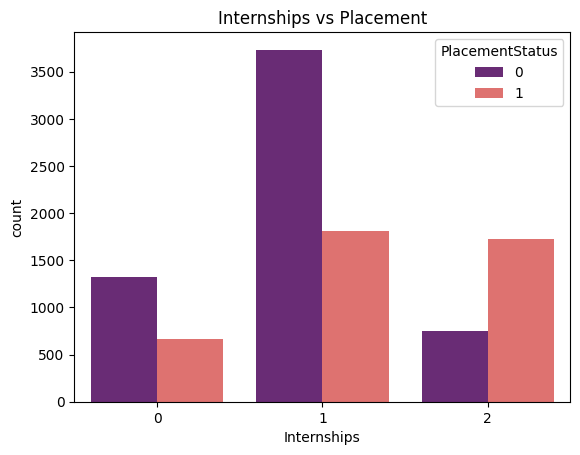

In [11]:
#Internship vs Placement
sns.countplot(x='Internships', hue='PlacementStatus', data=df, palette='magma')
plt.title("Internships vs Placement")
plt.show()

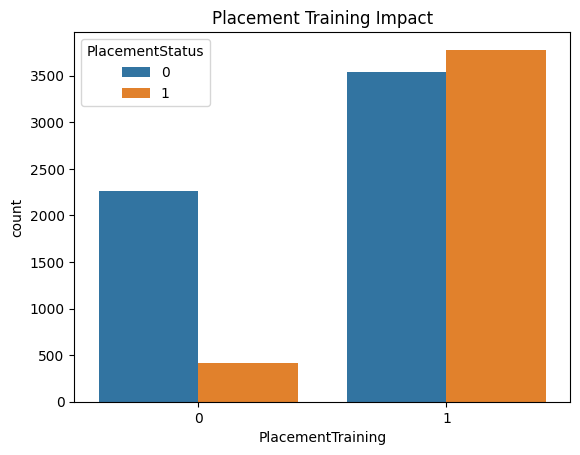

In [12]:
#Placement Training impact
sns.countplot(x='PlacementTraining', hue='PlacementStatus', data=df)
plt.title("Placement Training Impact")
plt.show()

<ipython-input-13-a2680c1e24bb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PlacementStatus', y='CGPA', data=df, palette='Blues')


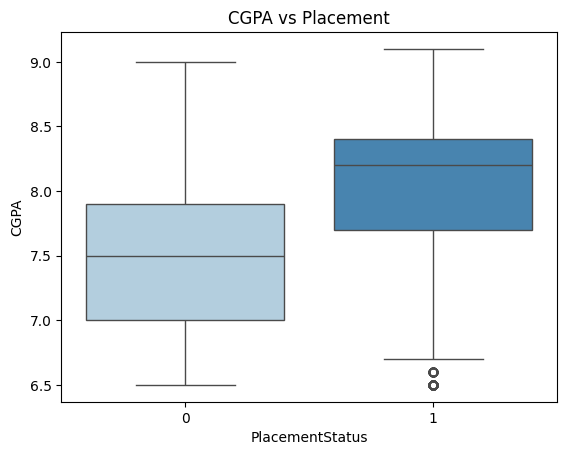

In [13]:
#CGPA vs Placement
sns.boxplot(x='PlacementStatus', y='CGPA', data=df, palette='Blues')
plt.title("CGPA vs Placement")
plt.show()

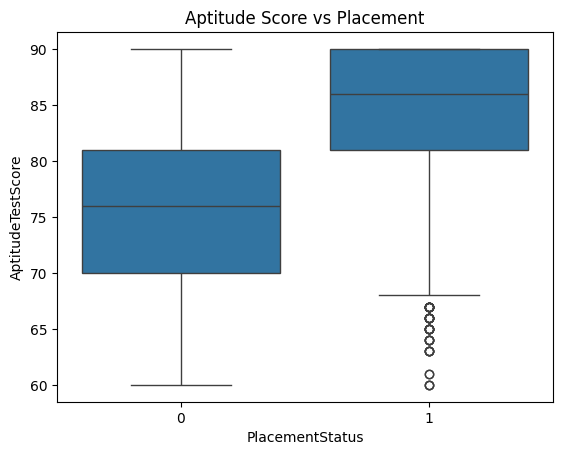

In [14]:
#Aptitude Test Score vs Placement
sns.boxplot(x='PlacementStatus', y='AptitudeTestScore', data=df)
plt.title("Aptitude Score vs Placement")
plt.show()

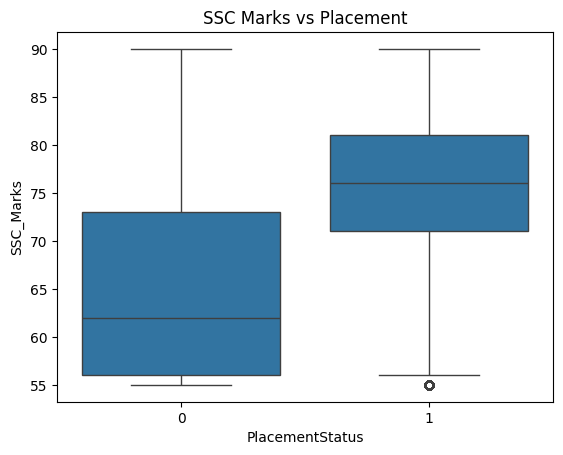

In [15]:
sns.boxplot(x='PlacementStatus', y='SSC_Marks', data=df)
plt.title("SSC Marks vs Placement")
plt.show()

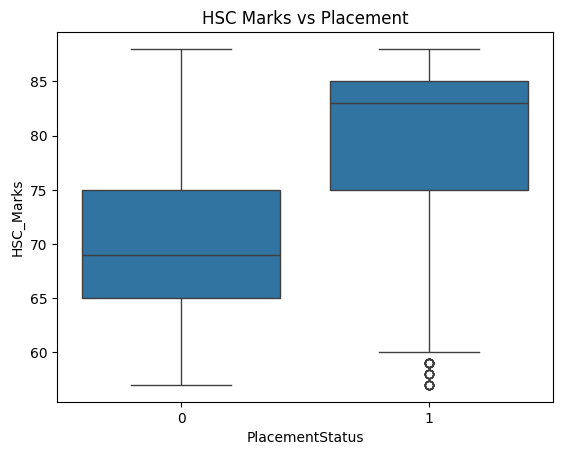

In [16]:
sns.boxplot(x='PlacementStatus', y='HSC_Marks', data=df)
plt.title("HSC Marks vs Placement")
plt.show()

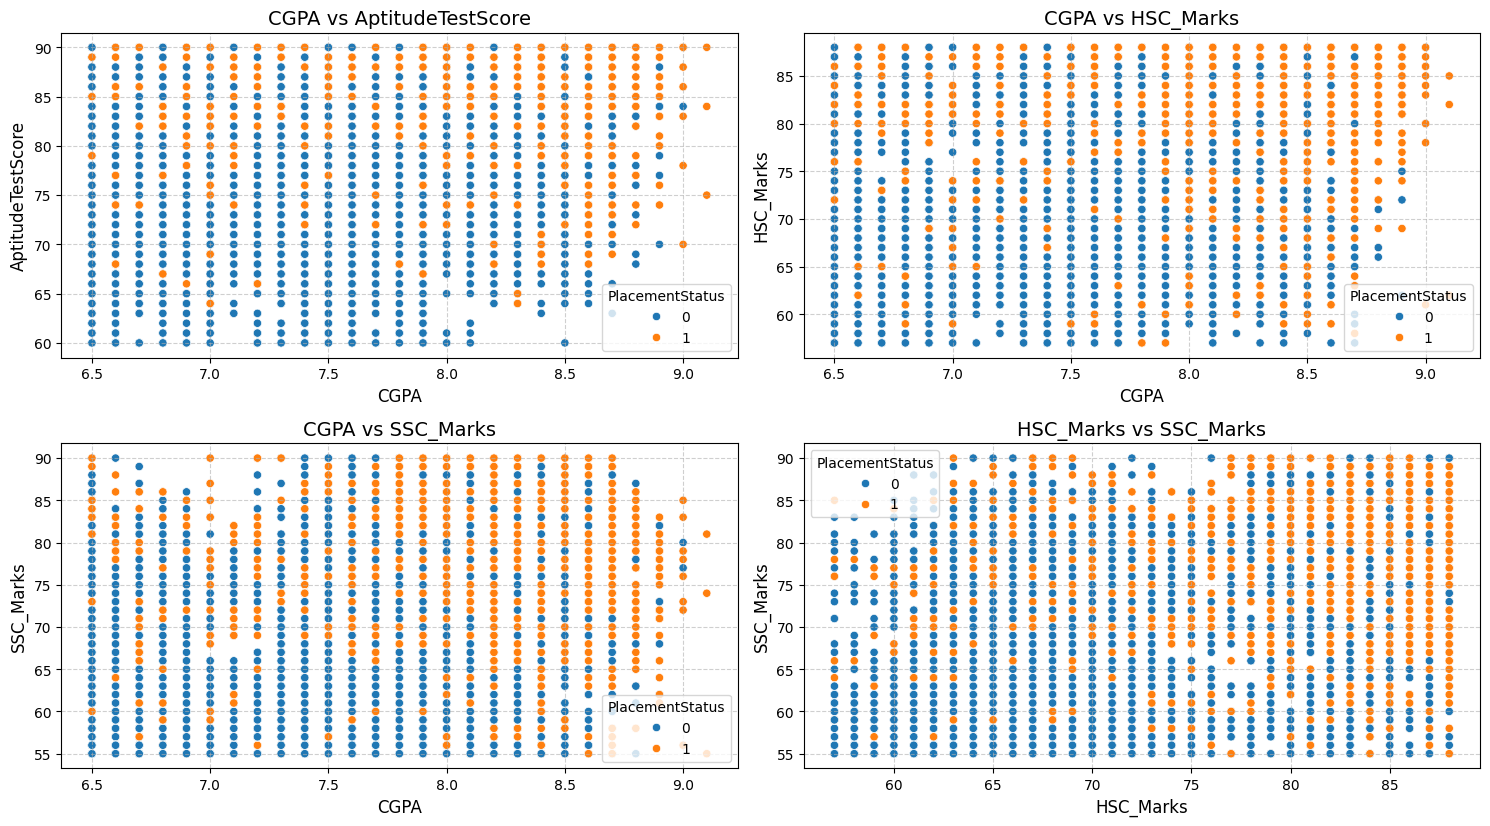

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical column pairs for scatter plots
scatter_plots = [
    ("CGPA", "AptitudeTestScore"),
    ("CGPA", "HSC_Marks"),
    ("CGPA", "SSC_Marks"),
    ("HSC_Marks", "SSC_Marks")
]

# Create scatter plots for each pair
plt.figure(figsize=(15, 12))
for i, (x_col, y_col) in enumerate(scatter_plots, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=df, x=x_col, y=y_col,hue='PlacementStatus')
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.title(f"{x_col} vs {y_col}", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

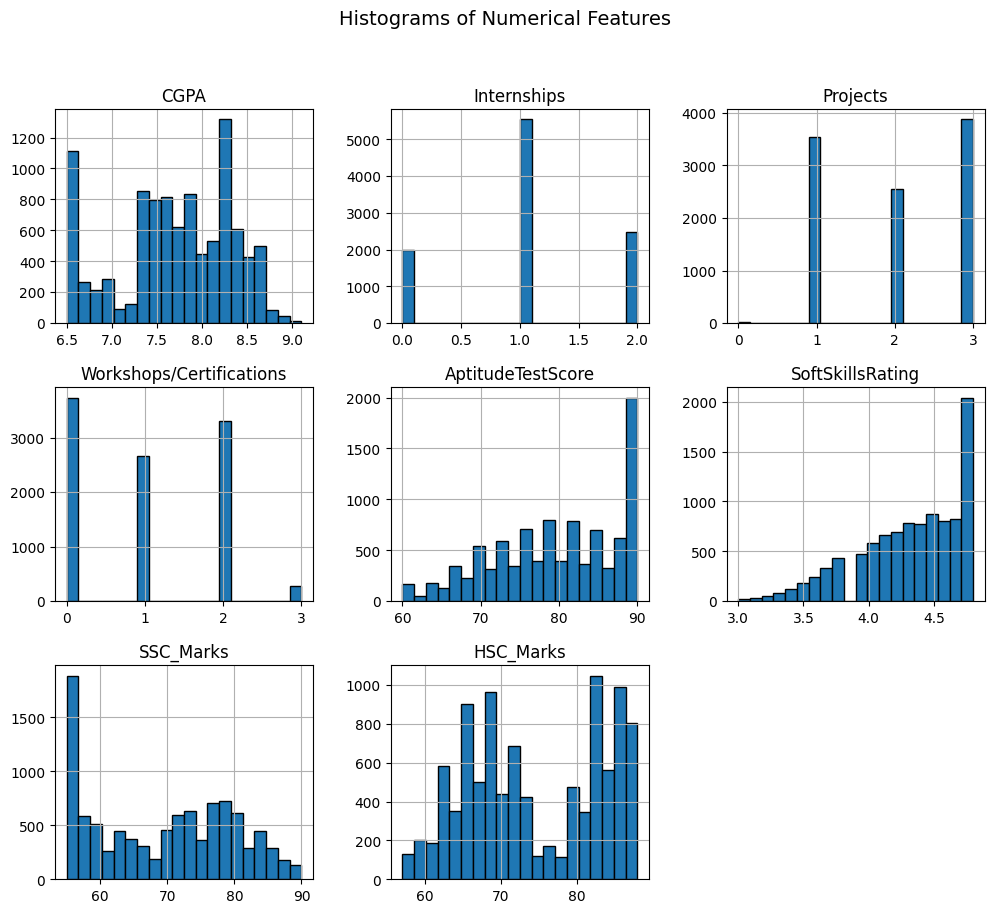

In [18]:
# Select only numerical columns (excluding categorical data)
num_cols = ['CGPA', 'Internships', 'Projects', 'Workshops/Certifications',
            'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']

# Plot histograms for numerical features
df[num_cols].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=14)
plt.show()

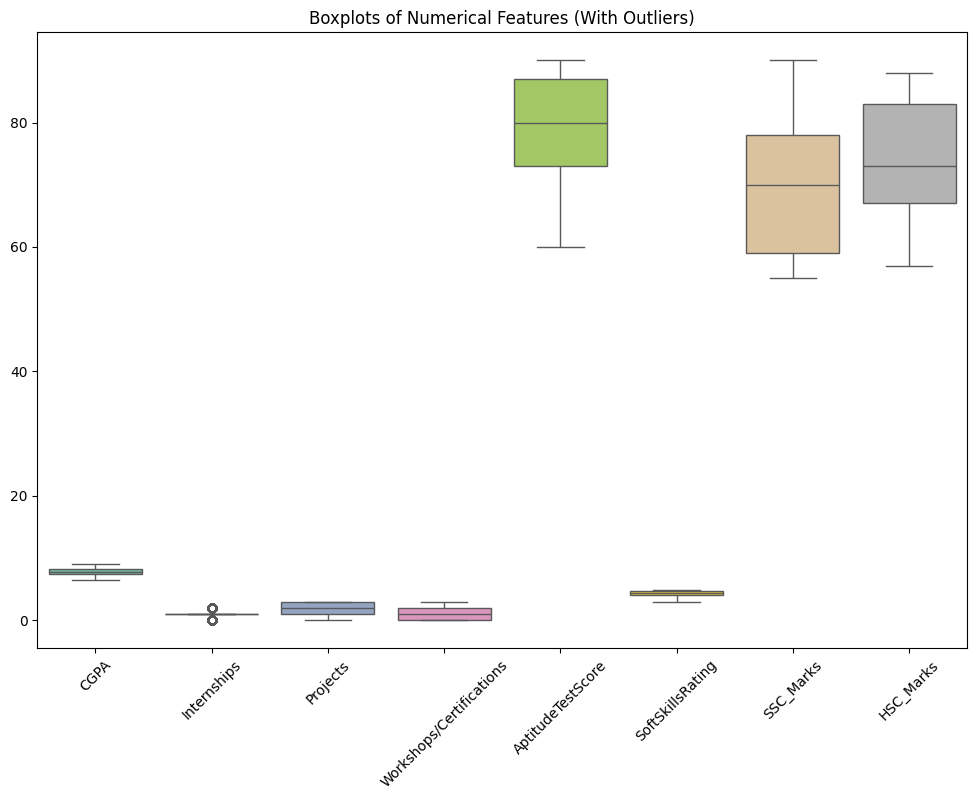

In [19]:
# Boxplot to visualize outliers (excluding categorical columns)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[num_cols], palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features (With Outliers)")
plt.show()

In [20]:
# Outlier Removal using IQR method
def remove_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

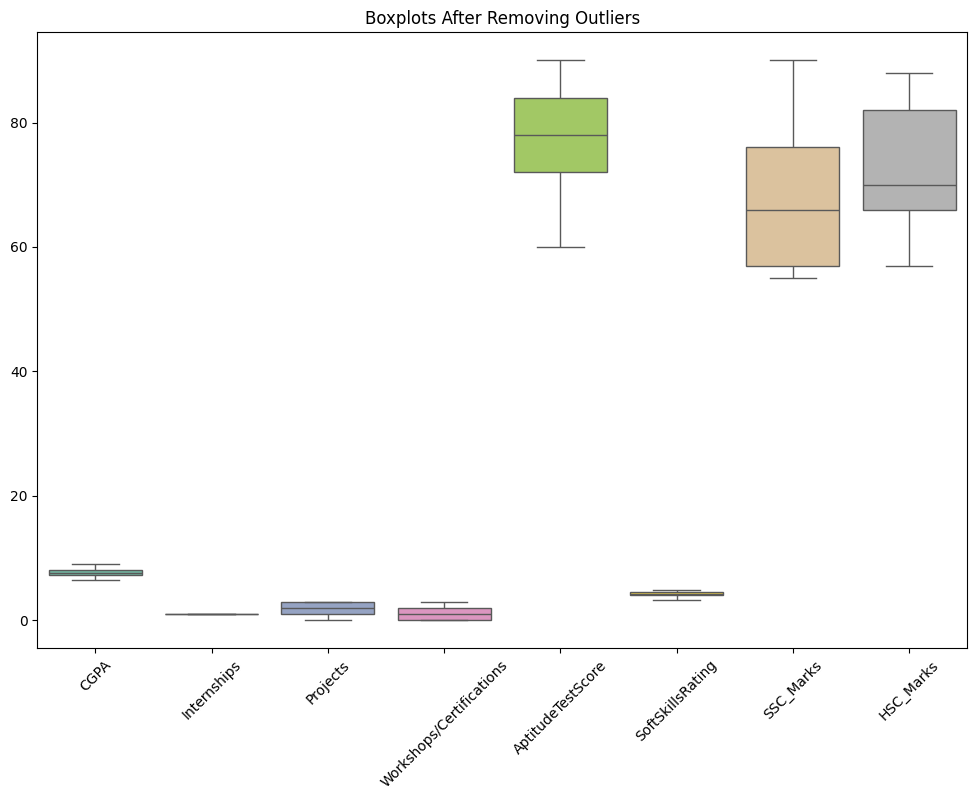

In [21]:
# Removing outliers from numerical columns
df_cleaned = remove_outliers(df, num_cols)

# Boxplot after removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned[num_cols], palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplots After Removing Outliers")
plt.show()

In [22]:
# Calculate Skewness and Kurtosis
for col in num_cols:
    print(f"{col} - Skewness: {skew(df_cleaned[col]):.2f}, Kurtosis: {kurtosis(df_cleaned[col]):.2f}")


CGPA - Skewness: -0.22, Kurtosis: -0.79
Internships - Skewness: nan, Kurtosis: nan
Projects - Skewness: 0.22, Kurtosis: -1.42
Workshops/Certifications - Skewness: 0.51, Kurtosis: -0.87
AptitudeTestScore - Skewness: -0.16, Kurtosis: -0.79
SoftSkillsRating - Skewness: -0.46, Kurtosis: -0.60
SSC_Marks - Skewness: 0.28, Kurtosis: -1.23
HSC_Marks - Skewness: 0.29, Kurtosis: -1.21


<ipython-input-22-3e1b0d520fd6>:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print(f"{col} - Skewness: {skew(df_cleaned[col]):.2f}, Kurtosis: {kurtosis(df_cleaned[col]):.2f}")


In [23]:
# Splitting data into training and testing sets
X = df_cleaned.drop(columns=['PlacementStatus'])  # Features
y = df_cleaned['PlacementStatus']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Train and evaluate three machine learning models
models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Support Vector Machine": SVC(class_weight='balanced'),
    "Logistic Regression": LogisticRegression(class_weight='balanced')
}


Random Forest Model Accuracy: 0.7804


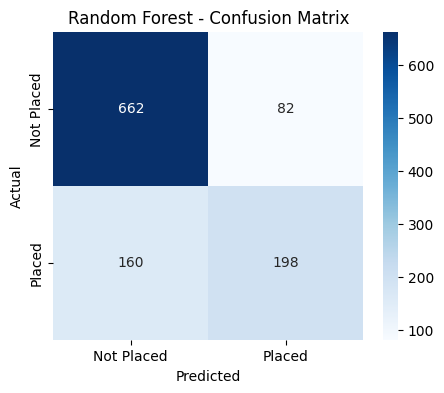

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       744
           1       0.71      0.55      0.62       358

    accuracy                           0.78      1102
   macro avg       0.76      0.72      0.73      1102
weighted avg       0.77      0.78      0.77      1102


Support Vector Machine Model Accuracy: 0.7731


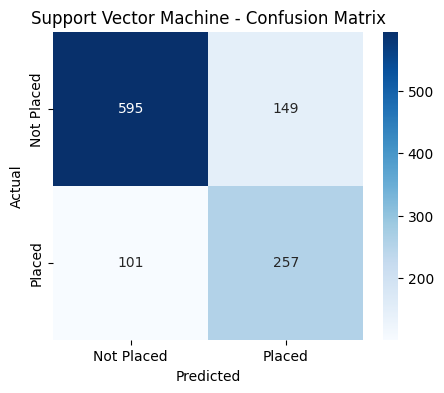

              precision    recall  f1-score   support

           0       0.85      0.80      0.83       744
           1       0.63      0.72      0.67       358

    accuracy                           0.77      1102
   macro avg       0.74      0.76      0.75      1102
weighted avg       0.78      0.77      0.78      1102


Logistic Regression Model Accuracy: 0.7695


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


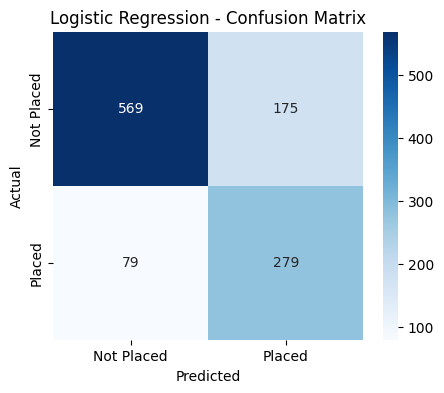

              precision    recall  f1-score   support

           0       0.88      0.76      0.82       744
           1       0.61      0.78      0.69       358

    accuracy                           0.77      1102
   macro avg       0.75      0.77      0.75      1102
weighted avg       0.79      0.77      0.78      1102



In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Dictionary to store accuracies
accuracies = {}

# Train, evaluate, and visualize
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store accuracy for bar graph
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc

    print(f"\n{name} Model Accuracy: {acc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Classification Report
    print(classification_report(y_test, y_pred))

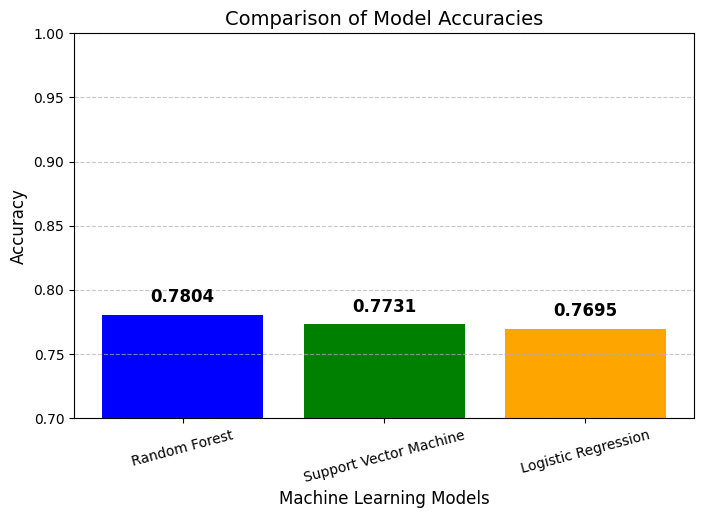

In [26]:
# Plot bar graph for accuracy comparison
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange'])

# Add labels and title
plt.title('Comparison of Model Accuracies', fontsize=14)
plt.xlabel('Machine Learning Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.7, 1.0)  # Set limit for better visualization
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show accuracy values on bars
for i, (name, acc) in enumerate(accuracies.items()):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha='center', fontsize=12, fontweight='bold')

plt.show()

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [33]:
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
accuracies['XGBoost'] = xgb_acc
print("\nXGBoost Model Accuracy:", round(xgb_acc, 4))
print(classification_report(y_test, y_pred_xgb))


XGBoost Model Accuracy: 0.7786
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       744
           1       0.69      0.59      0.63       358

    accuracy                           0.78      1102
   macro avg       0.75      0.73      0.74      1102
weighted avg       0.77      0.78      0.77      1102



In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute Class Weights to handle imbalance
class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Define the ANN Model
ann_model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    BatchNormalization(),  # Normalizes activations
    Dropout(0.3),  # Prevents overfitting

    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation="sigmoid")  # Output Layer for Binary Classification
])

# Compile Model with Adam Optimizer & Adjusted Learning Rate
ann_model.compile(optimizer=Adam(learning_rate=0.0005), loss="binary_crossentropy", metrics=["accuracy"])

# Train the Model with Class Weights
history = ann_model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1, class_weight=class_weight_dict)

# Evaluate ANN Model
ann_acc = ann_model.evaluate(X_test, y_test, verbose=0)[1]
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype(int)
accuracies['ANN'] = ann_acc
print("\n ANN Model Improved Accuracy:", round(ann_acc, 4))
print(classification_report(y_test, y_pred_ann))


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6238 - loss: 0.6929
Epoch 2/100
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6906 - loss: 0.5900
Epoch 3/100
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7330 - loss: 0.5521
Epoch 4/100
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7235 - loss: 0.5691
Epoch 5/100
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7294 - loss: 0.5382
Epoch 6/100
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7383 - loss: 0.5449
Epoch 7/100
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7414 - loss: 0.5440
Epoch 8/100
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7625 - loss: 0.5170
Epoch 9/100
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7573 - loss: 0.5346
Epoch 10/100
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7462 - loss: 0.5210
Epoch 11/100
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7597 - loss: 0.5015
Epoch 12/100
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

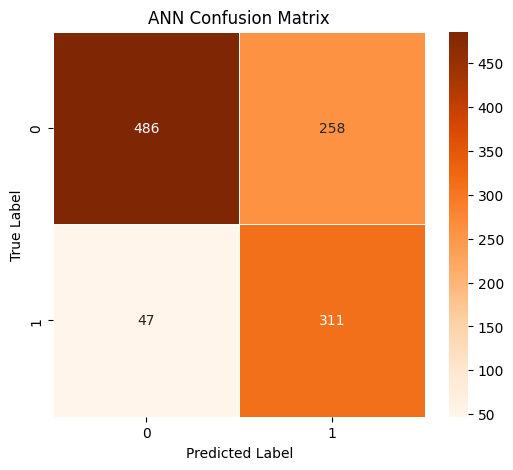

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
cm_ann = confusion_matrix(y_test, y_pred_ann)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_ann, annot=True, fmt="d", cmap="Oranges", linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("ANN Confusion Matrix")
plt.show()


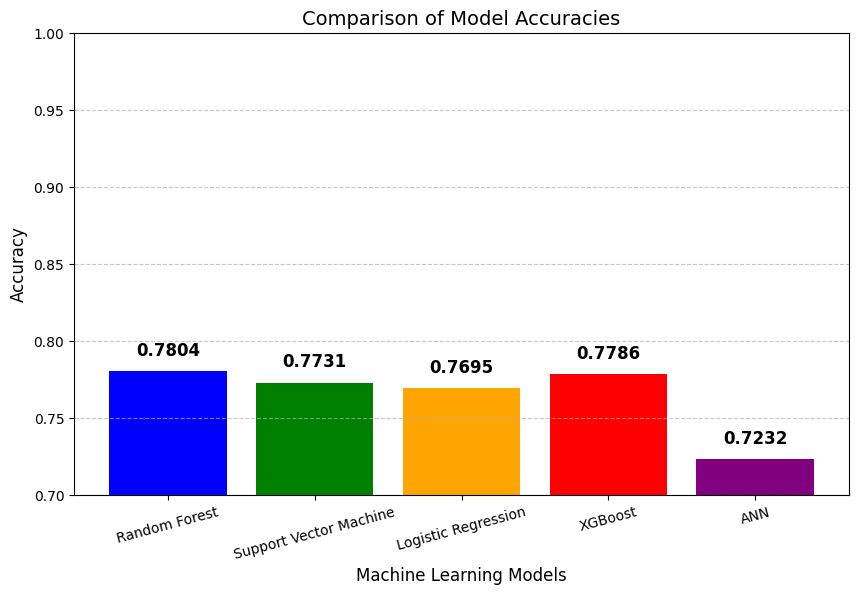

In [36]:
# Ensure all models have a unique color
colors = ['blue', 'green', 'orange', 'red', 'purple']

# Bar Graph for Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=colors[:len(accuracies)])  # Ensure enough colors
plt.title('Comparison of Model Accuracies', fontsize=14)
plt.xlabel('Machine Learning Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.7, 1.0)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show accuracy values on bars
for i, (name, acc) in enumerate(accuracies.items()):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha='center', fontsize=12, fontweight='bold')

plt.show()
